In [23]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [24]:
import yfinance as yf

# Download NFLX data from 2018-01-01 to 2025-04-30
df_NFLX = yf.download(
    "NFLX", 
    start="2016-08-23", 
    end="2020-06-10"   # end date is exclusive, so use 2025-05-01 for up to April 30
)

# Reset index to make 'Date' a column
df_NFLX.reset_index(inplace=True)



[*********************100%***********************]  1 of 1 completed


In [25]:



# Save the DataFrame as a CSV file in the correct folder
df_NFLX.to_csv(r"C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\NFLX_historical_data.csv", index=False)


In [26]:
print("Null values count per column:")
print(df_NFLX.isnull().sum())


Null values count per column:
Price   Ticker
Date              0
Close   NFLX      0
High    NFLX      0
Low     NFLX      0
Open    NFLX      0
Volume  NFLX      0
dtype: int64


In [27]:
df_NFLX.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,NFLX,NFLX,NFLX,NFLX,NFLX
count,955,955.000000,955.000000,955.000000,955.000000,9.550000e+02
mean,2018-07-16 08:16:05.026178048,268.870220,272.887393,264.461183,268.768890,8.546035e+06
min,2016-08-23 00:00:00,94.559998,95.379997,93.260002,95.040001,1.616300e+06
25%,2017-08-03 12:00:00,171.199997,173.514999,168.900002,170.644997,5.259400e+06
50%,2018-07-17 00:00:00,294.070007,298.940002,289.100006,294.769989,7.069100e+06
75%,2019-06-27 12:00:00,352.404999,358.229996,347.139999,352.785004,1.014645e+07
max,2020-06-09 00:00:00,454.190002,458.970001,450.470001,454.250000,5.841040e+07
std,NaN,97.566900,99.343696,95.618638,97.551771,5.156294e+06


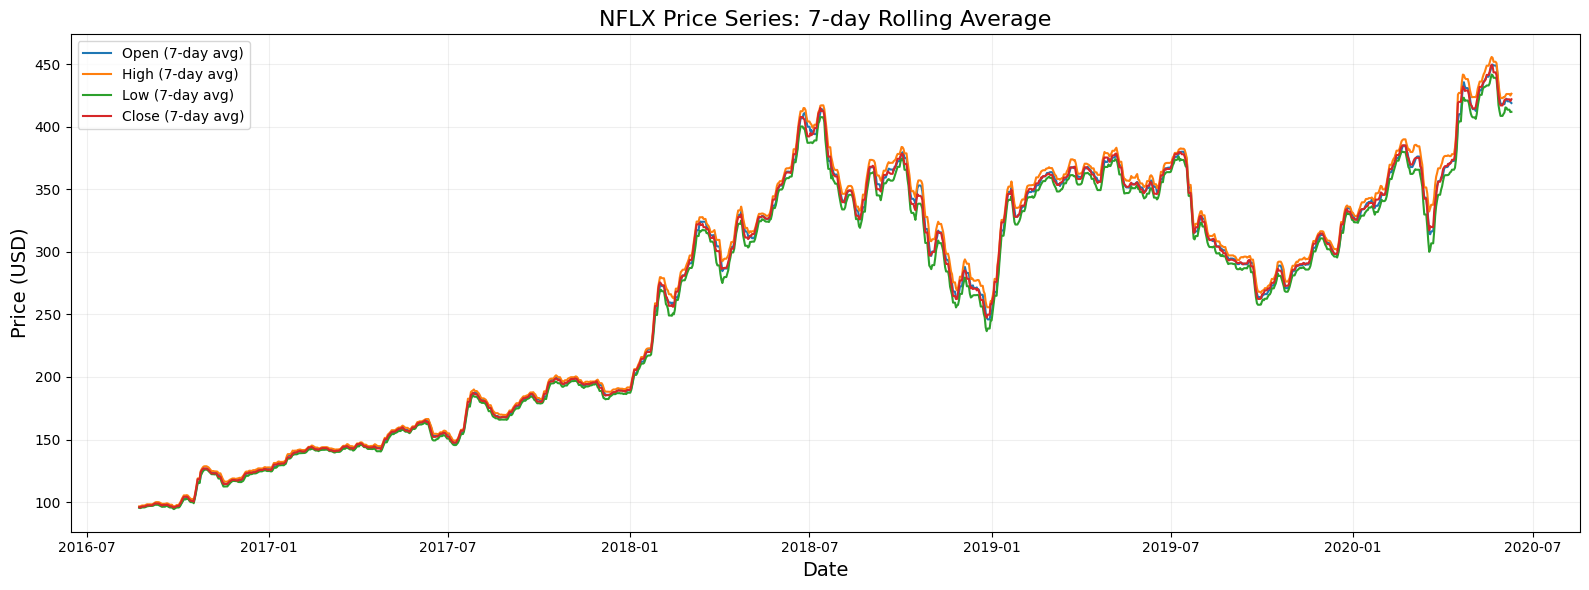

In [28]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_NFLX, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("NFLX Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


In [29]:
print(df_NFLX.columns)
print(df_NFLX.columns[df_NFLX.columns.duplicated()])
print(type(df_NFLX['Close']))  # Should be Series, not DataFrame!



MultiIndex([(  'Date',     ''),
            ( 'Close', 'NFLX'),
            (  'High', 'NFLX'),
            (   'Low', 'NFLX'),
            (  'Open', 'NFLX'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])
MultiIndex([], names=['Price', 'Ticker'])
<class 'pandas.core.frame.DataFrame'>


In [30]:
df_NFLX.columns = ['_'.join([str(c) for c in col if c]) for col in df_NFLX.columns.values]
# Now 'Close_NFLX', 'High_NFLX', ...


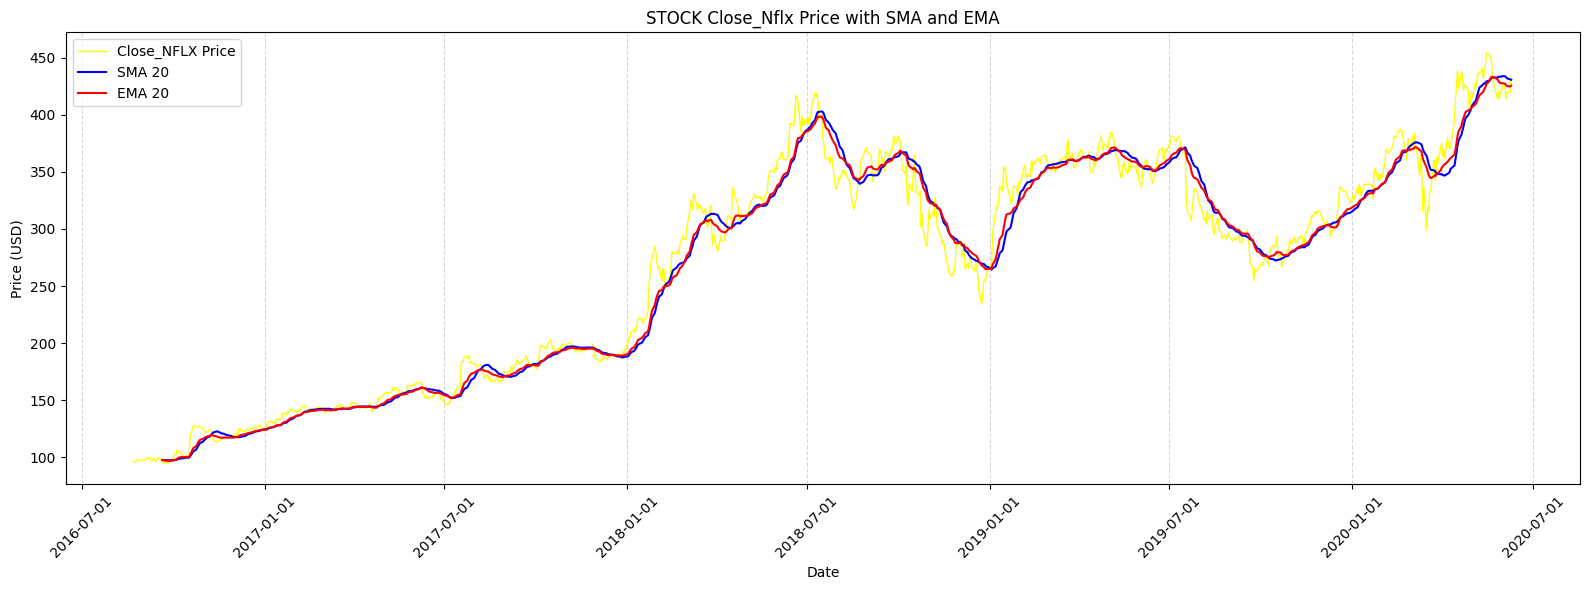

In [31]:
from src.plot_ma import plot_ma
plot_ma(df_NFLX, 'Close_NFLX')

### NFLX Close Price with SMA and EMA – Detailed Analysis

- **Long-term Trend:**  
  From 2016 to 2020, Netflix (NFLX) shows a clear overall uptrend. The closing price steadily increases, reflecting the company’s rapid growth and rising market confidence.

- **Moving Averages:**
  - **SMA 20 (blue):** The 20-day Simple Moving Average is a smoother curve that tracks the average closing price over the last 20 days, lagging behind sharp price changes.
  - **EMA 20 (red):** The 20-day Exponential Moving Average gives more weight to recent prices and reacts faster to changes in price direction.

- **Uptrends and Bullish Momentum:**  
  During periods when the yellow closing price line remains above both the SMA and EMA, Netflix is in a strong uptrend. Both moving averages also turn upward, confirming bullish momentum and investor optimism.

- **Corrections and Downtrends:**  
  There are several clear corrections (notably in late 2018 and early 2020), where the closing price drops below both moving averages. In these periods, the SMA and EMA curve downward, and the gap between the moving averages narrows. These moves often align with broader market selloffs.

- **Trend Reversals and Recovery:**  
  After each significant dip, the closing price rebounds, eventually crossing back above the SMA and EMA. The EMA (red) usually turns upward before the SMA, signaling the earliest trend reversal. This highlights the importance of the EMA for early detection of trend shifts.

- **Price Volatility:**  
  The chart displays periods of high volatility, with sharp peaks and troughs—especially around 2018 and early 2020. However, each sharp decline is followed by a strong recovery, showing Netflix’s resilience as a stock.

- **Interaction of Price and Averages:**  
  When the closing price surges far above both moving averages, it can indicate strong momentum but also a potential “overbought” condition, where short-term pullbacks become more likely.

- **Technical Trading Signals:**  
  - **Bullish:** When the closing price crosses above both SMA and EMA, and both lines turn up, it often signals the start of a new uptrend.
  - **Bearish:** When the closing price falls below both averages and the lines turn down, it may signal the start of a downtrend or correction.

- **P

- **Summary:**  
  Overall, the chart demonstrates Netflix’s growth story, its response to market volatility, and the value of combining price action with moving averages for deeper stock analysis.


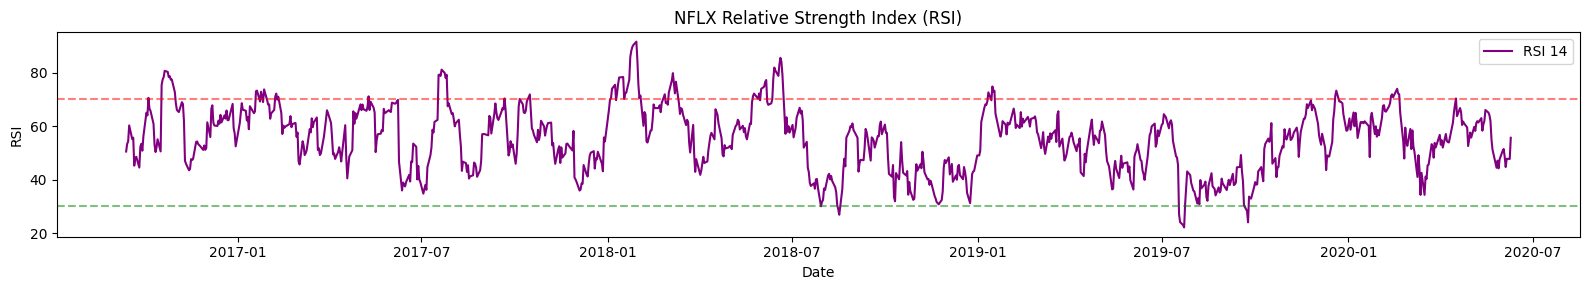

In [32]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_NFLX, price_col='Close_NFLX', ticker_name='NFLX')

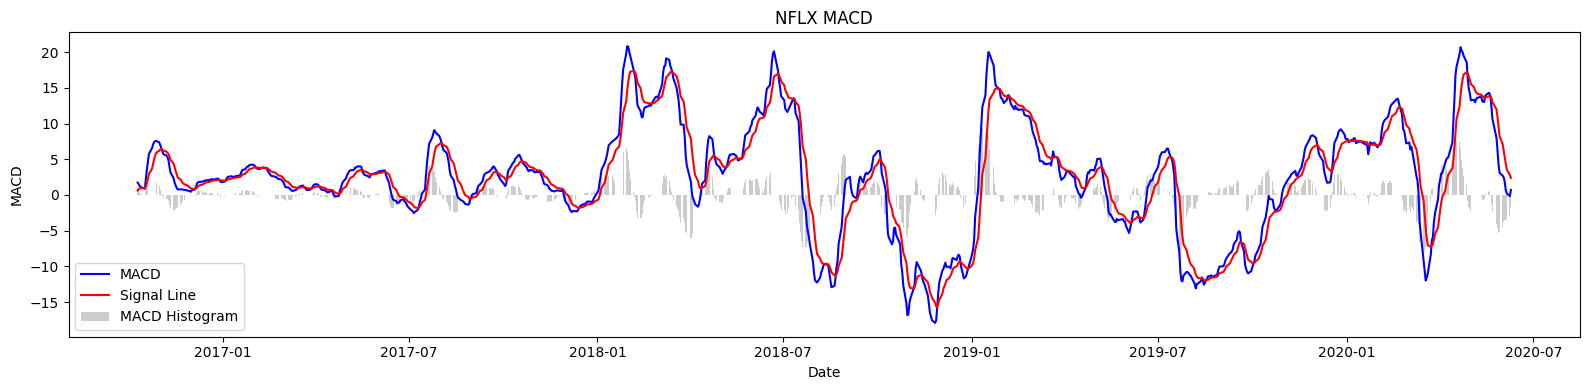

In [33]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_NFLX, price_col='Close_NFLX', ticker_name='NFLX')